# The movie database 5000 analysis

### Content:
+ Introduction: The movie database 5000
+ Data description and objectives
+ Data manipulation and validation
+ Conclusion



#### Introduction: The movie database 5000

The movie database is dataset which has 5000 films' data. Every film is worldwide famed films which everyone still watched. Data of this films starts from 4 september 1916 till 3 february 2017.

Dataset was found by TMDb(https://www.themoviedb.org/?language=ru)
This information was created for big cinematography companies such as "Pixar", "Warner Bros." etc, for analyzing and making algorithms for choosing budget amount, genres, revenue predictions, etc. 

The movie database was updated two times, first time it was in 2013, second in 2017.
Data of this films was gaining from 2010 year. 

#### Data description and objectives:

If you need some information for your own film, at first you should analyze all the genres population, what you can do by this dataset.

+ budget - the amount of money($) used for film
+ genres - genre of the certain film
+ homepage - the site of film
+ keywords - words used to comfortable finding film
+ overview - brief meaning of film
+ production_companies - companies released film
+ production_countries - countries released film
+ revenue - amount of money company gained for film
+ spoken_languages - languages for film was dubbed
+ vote_count - amount of votes for film

Data manipulation and validation 5 parts:

+ Analyze most popular film
+ Analyze the longest film by runtime
+ Analyze the biggest revenue gained film
+ Analyze the most voted film
+ Analyze the oldest film by release_date
+ Cleaning the dataset from least neccessary information


In [61]:
import numpy as np
import scipy as sp
import pandas as pd
import requests
import json
import pickle
import time
import random
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import csv
from pandas.core.frame import DataFrame
import itertools


### Data manipulation and validation



In [5]:
# at first show all the information from dataset
data = pd.read_csv('tmdb.csv') 
data.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
# Cleaning dataset from least neccessary information
columns = ["id","title","release_date", "tagline", "popularity", "homepage", "budget", \
           "runtime", "vote_average", "vote_count", "original_language",  "revenue"] 
data = data[columns]
data.head(5)

,id,title,release_date,tagline,popularity,homepage,budget,runtime,vote_average,vote_count,original_language,revenue
0,19995,Avatar,2009-12-10,Enter the World of Pandora.,150.437577,http://www.avatarmovie.com/,237000000,162.0,7.2,11800,en,2787965087
1,285,Pirates of the Caribbean: At World's End,2007-05-19,"At the end of the world, the adventure begins.",139.082615,http://disney.go.com/disneypictures/pirates/,300000000,169.0,6.9,4500,en,961000000
2,206647,Spectre,2015-10-26,A Plan No One Escapes,107.376788,http://www.sonypictures.com/movies/spectre/,245000000,148.0,6.3,4466,en,880674609
3,49026,The Dark Knight Rises,2012-07-16,The Legend Ends,112.312950,http://www.thedarkknightrises.com/,250000000,165.0,7.6,9106,en,1084939099
4,49529,John Carter,2012-03-07,"Lost in our world, found in another.",43.926995,http://movies.disney.com/john-carter,260000000,132.0,6.1,2124,en,284139100


In [7]:
columns = ["id","title","release_date", "tagline", "popularity", "homepage", "budget", \
           "runtime", "vote_average", "vote_count", "original_language",  "revenue"] 
data = data[columns]
print(data.head(2))

      id                                     title release_date  \
0  19995                                    Avatar   2009-12-10   
1    285  Pirates of the Caribbean: At World's End   2007-05-19   

                                          tagline  popularity  \
0                     Enter the World of Pandora.  150.437577   
1  At the end of the world, the adventure begins.  139.082615   

                                       homepage     budget  runtime  \
0                   http://www.avatarmovie.com/  237000000    162.0   
1  http://disney.go.com/disneypictures/pirates/  300000000    169.0   

   vote_average  vote_count original_language     revenue  
0           7.2       11800                en  2787965087  
1           6.9        4500                en   961000000  


In [8]:
#cleaning data by release_date
data.sort_values(by=['release_date'])

,id,title,release_date,tagline,popularity,homepage,budget,runtime,vote_average,vote_count,original_language,revenue
4592,3059,Intolerance,1916-09-04,The Cruel Hand of Intolerance,3.232447,NaN,385907,197.0,7.4,60,en,8394751
4661,3060,The Big Parade,1925-11-05,NaN,0.785744,NaN,245000,151.0,7.0,21,en,22000000
2638,19,Metropolis,1927-01-10,There can be no understanding between the hand...,32.351527,NaN,92620000,153.0,8.0,657,de,650422
4457,905,Pandora's Box,1929-01-30,NaN,1.824184,NaN,0,109.0,7.6,45,de,0
4594,65203,The Broadway Melody,1929-02-08,The pulsating drama of Broadway's bared heart ...,0.968865,NaN,379000,100.0,5.0,19,en,4358000
...,...,...,...,...,...,...,...,...,...,...,...,...
4720,339408,The Birth of a Nation,2016-09-09,The Untold Story of Nat Turner,9.452808,http://www.foxsearchlight.com/thebirthofanation/,8500000,120.0,6.5,178,en,15861566
3302,374461,Mr. Church,2016-09-16,He was the one person she could always count on.,7.828459,NaN,8000000,104.0,7.0,129,en,0
3408,325373,Two Lovers and a Bear,2016-10-02,NaN,3.139294,NaN,0,96.0,6.8,27,en,0
4255,426469,Growing Up Smith,2017-02-03,It’s better to stand out than to fit in.,0.710870,http://www.growingupsmithmovie.com,0,102.0,7.4,7,en,0


In [9]:
len(data.sort_values(by=['release_date']))

4803

In [10]:
data.sort_values(by=['popularity'])

,id,title,release_date,tagline,popularity,homepage,budget,runtime,vote_average,vote_count,original_language,revenue
4553,380097,America Is Still the Place,NaN,NaN,0.000000,NaN,0,0.0,0.0,0,en,0
3361,77156,Alien Zone,1978-11-22,Don't you dare go in there!,0.000372,NaN,0,90.0,4.0,3,en,0
4727,65448,Penitentiary,1979-12-01,"There's only one way out, and 100 fools stand ...",0.001117,NaN,0,99.0,4.9,8,en,0
4118,325140,Hum To Mohabbat Karega,2000-05-26,NaN,0.001186,NaN,0,0.0,0.0,0,en,0
4625,426067,Midnight Cabaret,1990-01-01,The hot spot where Satan's waitin'.,0.001389,NaN,0,94.0,0.0,0,en,0
...,...,...,...,...,...,...,...,...,...,...,...,...
127,76341,Mad Max: Fury Road,2015-05-13,What a Lovely Day.,434.278564,http://www.madmaxmovie.com/,150000000,120.0,7.2,9427,en,378858340
94,118340,Guardians of the Galaxy,2014-07-30,All heroes start somewhere.,481.098624,http://marvel.com/guardians,170000000,121.0,7.9,9742,en,773328629
788,293660,Deadpool,2016-02-09,Witness the beginning of a happy ending,514.569956,http://www.foxmovies.com/movies/deadpool,58000000,108.0,7.4,10995,en,783112979
95,157336,Interstellar,2014-11-05,Mankind was born on Earth. It was never meant ...,724.247784,http://www.interstellarmovie.net/,165000000,169.0,8.1,10867,en,675120017


In [11]:
# cleaning data from null homepage
data = data.dropna(how='any',axis=0)
data[~data['homepage'].isnull()]

,id,title,release_date,tagline,popularity,homepage,budget,runtime,vote_average,vote_count,original_language,revenue
0,19995,Avatar,2009-12-10,Enter the World of Pandora.,150.437577,http://www.avatarmovie.com/,237000000,162.0,7.2,11800,en,2787965087
1,285,Pirates of the Caribbean: At World's End,2007-05-19,"At the end of the world, the adventure begins.",139.082615,http://disney.go.com/disneypictures/pirates/,300000000,169.0,6.9,4500,en,961000000
2,206647,Spectre,2015-10-26,A Plan No One Escapes,107.376788,http://www.sonypictures.com/movies/spectre/,245000000,148.0,6.3,4466,en,880674609
3,49026,The Dark Knight Rises,2012-07-16,The Legend Ends,112.312950,http://www.thedarkknightrises.com/,250000000,165.0,7.6,9106,en,1084939099
4,49529,John Carter,2012-03-07,"Lost in our world, found in another.",43.926995,http://movies.disney.com/john-carter,260000000,132.0,6.1,2124,en,284139100
...,...,...,...,...,...,...,...,...,...,...,...,...
4773,2292,Clerks,1994-09-13,Just because they serve you doesn't mean they ...,19.748658,http://www.miramax.com/movie/clerks/,27000,92.0,7.4,755,en,3151130
4781,255266,Dry Spell,2013-02-14,Getting divorced does funny things to a girl,0.048948,https://www.facebook.com/DrySpellMovie,22000,90.0,6.0,1,en,0
4791,157185,Tin Can Man,2007-01-01,Everything You've Heard is True,0.332679,http://tincanmanthemovie.com/,13,84.0,2.0,1,en,0
4796,14337,Primer,2004-10-08,What happens if it actually works?,23.307949,http://www.primermovie.com,7000,77.0,6.9,658,en,424760


In [12]:
# it's length
len(data[~data['homepage'].isnull()])

1493

In [13]:
check = data.notnull()   #Finding null values
check

,id,title,release_date,tagline,popularity,homepage,budget,runtime,vote_average,vote_count,original_language,revenue
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4773,True,True,True,True,True,True,True,True,True,True,True,True
4781,True,True,True,True,True,True,True,True,True,True,True,True
4791,True,True,True,True,True,True,True,True,True,True,True,True
4796,True,True,True,True,True,True,True,True,True,True,True,True


In [14]:
check.all()  #Checking all columns for null

id                   True
title                True
release_date         True
tagline              True
popularity           True
homepage             True
budget               True
runtime              True
vote_average         True
vote_count           True
original_language    True
revenue              True
dtype: bool

In [15]:
data.dropna() #Remove all rows with null value in any column

,id,title,release_date,tagline,popularity,homepage,budget,runtime,vote_average,vote_count,original_language,revenue
0,19995,Avatar,2009-12-10,Enter the World of Pandora.,150.437577,http://www.avatarmovie.com/,237000000,162.0,7.2,11800,en,2787965087
1,285,Pirates of the Caribbean: At World's End,2007-05-19,"At the end of the world, the adventure begins.",139.082615,http://disney.go.com/disneypictures/pirates/,300000000,169.0,6.9,4500,en,961000000
2,206647,Spectre,2015-10-26,A Plan No One Escapes,107.376788,http://www.sonypictures.com/movies/spectre/,245000000,148.0,6.3,4466,en,880674609
3,49026,The Dark Knight Rises,2012-07-16,The Legend Ends,112.312950,http://www.thedarkknightrises.com/,250000000,165.0,7.6,9106,en,1084939099
4,49529,John Carter,2012-03-07,"Lost in our world, found in another.",43.926995,http://movies.disney.com/john-carter,260000000,132.0,6.1,2124,en,284139100
...,...,...,...,...,...,...,...,...,...,...,...,...
4773,2292,Clerks,1994-09-13,Just because they serve you doesn't mean they ...,19.748658,http://www.miramax.com/movie/clerks/,27000,92.0,7.4,755,en,3151130
4781,255266,Dry Spell,2013-02-14,Getting divorced does funny things to a girl,0.048948,https://www.facebook.com/DrySpellMovie,22000,90.0,6.0,1,en,0
4791,157185,Tin Can Man,2007-01-01,Everything You've Heard is True,0.332679,http://tincanmanthemovie.com/,13,84.0,2.0,1,en,0
4796,14337,Primer,2004-10-08,What happens if it actually works?,23.307949,http://www.primermovie.com,7000,77.0,6.9,658,en,424760


## Data visualization

### The most popular film

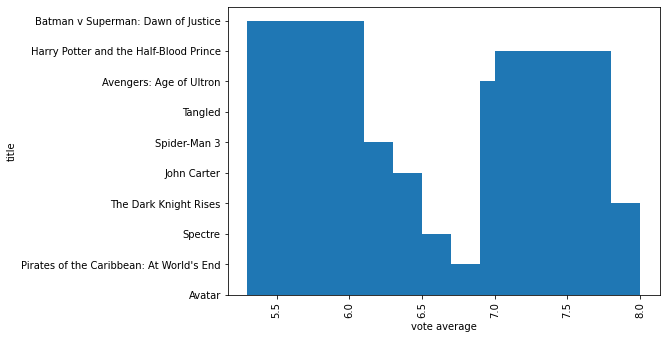

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
plt.xlabel('vote average')
plt.ylabel('title')
ax.bar(data['vote_average'].head(10), data['title'].head(10))
plt.show()

### Analyze the longest film


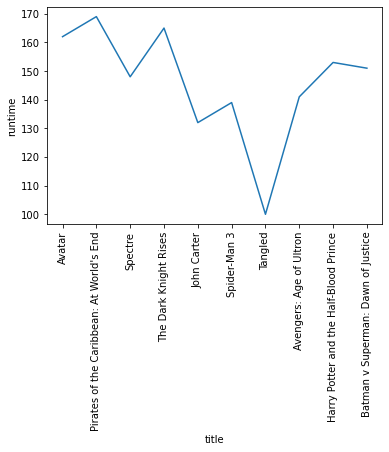

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [17]:
plt.plot(data['title'].head(10), data['runtime'].head(10))
plt.xticks(rotation=90)
plt.xlabel('title')
plt.ylabel('runtime')
plt.show()
plt.figure(figsize=(10,5))

### Analyze the biggest revenue gained film

Text(0, 0.5, 'title')

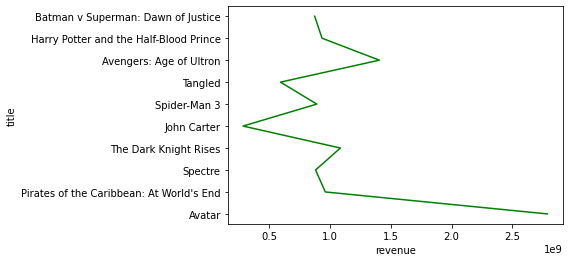

In [34]:
plt.plot( data['revenue'].head(10), data['title'].head(10), '#008000')

plt.xlabel('revenue')
plt.ylabel('title')


### Analyze the most voted film

In [54]:
df = ( data['vote_count'].head(10), data['title'].head(10))
plt.scatter( data['vote_count'].head(10), data['title'].head(10))
plt.xlabel('vote_count')
plt.ylabel('title')


TypeError: scatter() missing 1 required positional argument: 'y'

### Analyze the oldest film by release_date

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

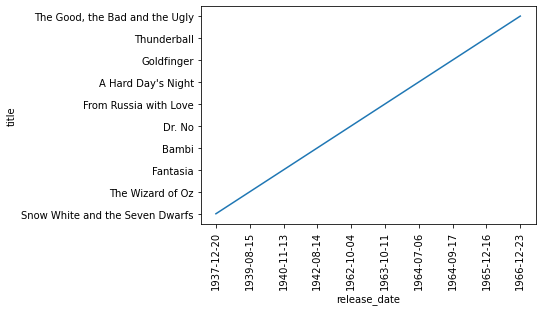

In [74]:
df = ( data['release_date'].head(10), data['title'].head(10))
data.sort_values(by=['release_date'], inplace=True)
plt.plot( data['release_date'].head(10), data['title'].head(10))
plt.xlabel('release_date')
plt.ylabel('title')
plt.xticks(rotation=90)



# Conclusion
Now, we can see that TMDB has a big amount of unsorted and uncleaned data. The popularity of films could be defined by a lot of different categories. The most popular film(from first 10) is "Batman vs Superman", and the longest film(from first 10) is"Pirates of the Carribean:At world's end". 